# 🍽️ Restaurant Sentiment Analysis - Data Exploration

**Project:** Hospitality & Service - Enhancing Restaurant Experience  
**Author:** Akakinad  
**Date:** January 29, 2026  
**Objective:** Explore customer reviews to understand sentiment patterns and prepare data for machine learning

---

## Table of Contents
1. Setup & Data Loading
2. Initial Data Inspection
3. Data Quality Check
4. Sentiment Distribution Analysis
5. Review Text Analysis
6. Key Insights & Next Steps

---

## 1️⃣ Setup & Data Loading

Import necessary libraries and load the dataset.

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [3]:
# Load the restaurant reviews dataset
df = pd.read_csv('./data/raw/Restaurant_Reviews.tsv', 
                 delimiter='\t',
                 quoting=3)

print(f"✅ Dataset loaded successfully!")
print(f"📊 Shape: {df.shape[0]} rows × {df.shape[1]} columns")

✅ Dataset loaded successfully!
📊 Shape: 1000 rows × 2 columns


## 2️⃣ Initial Data Inspection

Let's examine the structure and content of our dataset.

In [4]:
# Display first 5 reviews
print("First 5 rows of the dataset:\n")
df.head()

First 5 rows of the dataset:



,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
# Check column names and data types
print("Column Information:")
print("=" * 50)
print(f"Columns: {df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")

Column Information:
Columns: ['Review', 'Liked']

Data Types:
Review      str
Liked     int64
dtype: object


In [6]:
# Get basic information about the dataset
print("Dataset Overview:")
print("=" * 50)
df.info()

Dataset Overview:
<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Review  1000 non-null   str  
 1   Liked   1000 non-null   int64
dtypes: int64(1), str(1)
memory usage: 15.8 KB


## 3️⃣ Data Quality Check

Verify data completeness and identify any issues.

In [7]:
# Check for missing values
print("Missing Values Check:")
print("=" * 50)
missing = df.isnull().sum()
print(missing)

if missing.sum() == 0:
    print("\n✅ Perfect! No missing values detected.")
else:
    print(f"\n⚠️ Warning: {missing.sum()} missing values found.")

Missing Values Check:
Review    0
Liked     0
dtype: int64

✅ Perfect! No missing values detected.


In [8]:
# Check for duplicate reviews
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

if duplicates == 0:
    print("✅ No duplicates found.")
else:
    print(f"⚠️ Found {duplicates} duplicate reviews.")

Duplicate rows: 4
⚠️ Found 4 duplicate reviews.


In [9]:
# Check unique values in 'Liked' column
print("Target Variable (Liked) Analysis:")
print("=" * 50)
print(f"Unique values: {df['Liked'].unique()}")
print(f"Value counts:\n{df['Liked'].value_counts()}")

Target Variable (Liked) Analysis:
Unique values: [1 0]
Value counts:
Liked
1    500
0    500
Name: count, dtype: int64


### 🧹 Data Cleaning

Remove duplicate reviews to ensure data quality.

In [10]:
# Remove duplicate reviews
print(f"Before: {len(df)} reviews")

df_clean = df.drop_duplicates()

print(f"After: {len(df_clean)} reviews")
print(f"✅ Removed {len(df) - len(df_clean)} duplicate reviews")

Before: 1000 reviews
After: 996 reviews
✅ Removed 4 duplicate reviews


In [11]:
# Verify the cleaned dataset
print("Cleaned Dataset Summary:")
print("=" * 50)
print(f"Total reviews: {len(df_clean)}")
print(f"Positive reviews: {df_clean['Liked'].sum()}")
print(f"Negative reviews: {(df_clean['Liked'] == 0).sum()}")

Cleaned Dataset Summary:
Total reviews: 996
Positive reviews: 499
Negative reviews: 497


## 4️⃣ Sentiment Distribution Analysis

Visualize the balance between positive and negative reviews.

In [12]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for professional-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Visualization libraries imported!")

✅ Visualization libraries imported!


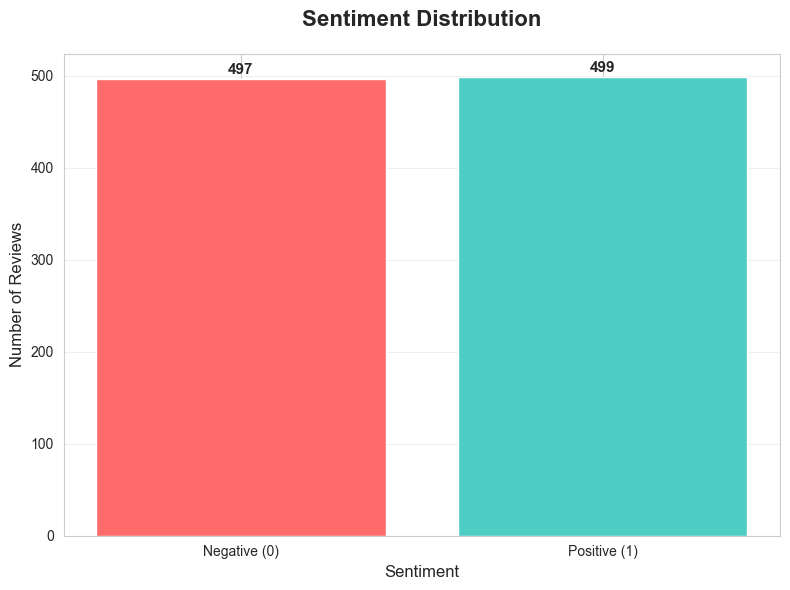

📊 Dataset is BALANCED: 50.1% positive


In [13]:
# Create sentiment distribution bar chart
plt.figure(figsize=(8, 6))

# Count plot
sentiment_counts = df_clean['Liked'].value_counts().sort_index()
colors = ['#FF6B6B', '#4ECDC4']  # Red for negative, Teal for positive

plt.bar(['Negative (0)', 'Positive (1)'], sentiment_counts.values, color=colors)
plt.title('Sentiment Distribution', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(sentiment_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print(f"📊 Dataset is BALANCED: {sentiment_counts.values[1]/(sentiment_counts.sum())*100:.1f}% positive")

In [14]:
# Summary statistics
print("Dataset Summary:")
print("=" * 50)
print(f"Total Reviews: {len(df_clean)}")
print(f"Positive Reviews: {sentiment_counts[1]} ({sentiment_counts[1]/len(df_clean)*100:.1f}%)")
print(f"Negative Reviews: {sentiment_counts[0]} ({sentiment_counts[0]/len(df_clean)*100:.1f}%)")
print(f"\n✅ Dataset is well-balanced for binary classification!")

Dataset Summary:
Total Reviews: 996
Positive Reviews: 499 (50.1%)
Negative Reviews: 497 (49.9%)

✅ Dataset is well-balanced for binary classification!


In [16]:
# Save cleaned dataset for future use
df_clean.to_csv('./data/processed/reviews_cleaned.csv', index=False)

print("✅ Cleaned dataset saved to: data/processed/reviews_cleaned.csv")
print(f"📁 {len(df_clean)} reviews ready for analysis!")

✅ Cleaned dataset saved to: data/processed/reviews_cleaned.csv
📁 996 reviews ready for analysis!
